# House price analysis in California 
### By Umer Tahir
This file is intended for analysis purposes, aiming to identify the best model with the highest accuracy. It includes examining various features of the model and creating some custom features for user convenience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [2]:
data= pd.read_csv("housing.csv")


In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#preprocessing the categorical data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Total bedroom has some values missing but as we have big enough dataset to train and test
# we will drop the null values
data.dropna(inplace=True)

In [6]:
# Now we are going to split the database into train and test dataset
# x are the features and y is the target value which is going to be median_house value 
X= data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [8]:
# this section is just to analysing the data and the correlation of the features with
#the target
train_data= X_train.join(y_train)
test_data= X_test.join(y_test)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

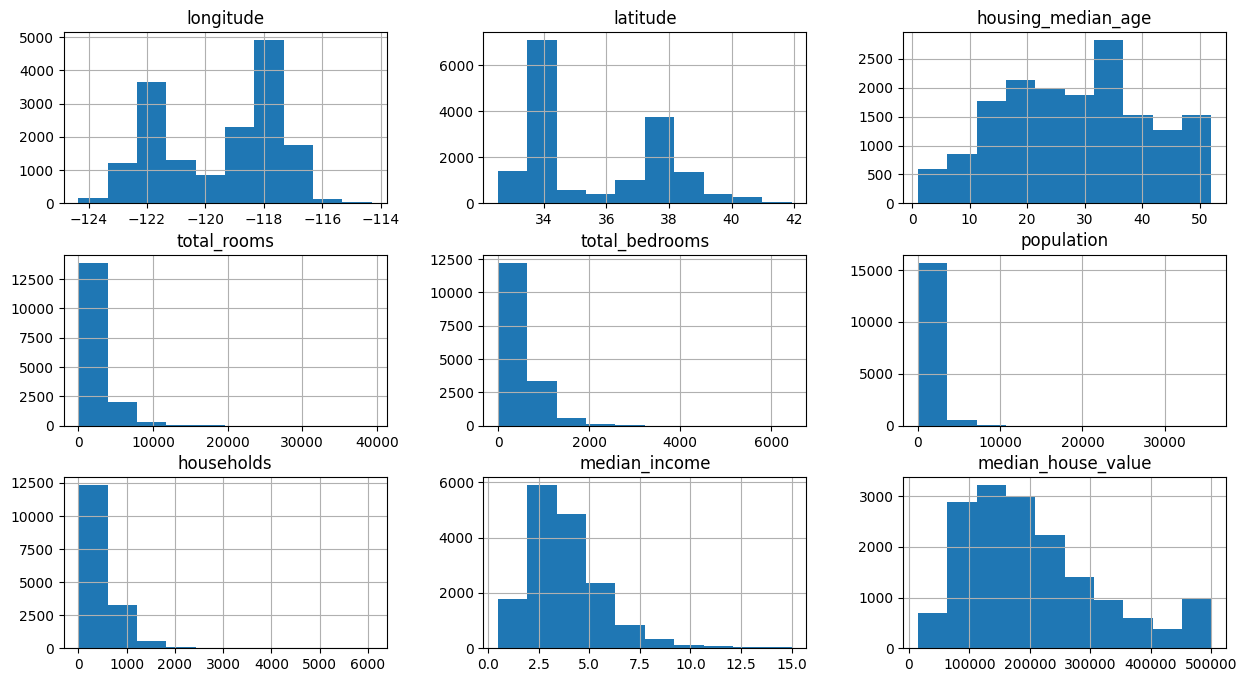

In [9]:
train_data.hist(figsize=(15,8))

In [10]:
#ocean proximity is a multi- category variable so we are printing the categories and then using pandas we are turning each category to 
# true and false 
train_data.ocean_proximity.value_counts()
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6586,True,False,False,False,False
5607,True,False,False,False,False
10407,True,False,False,False,False
19640,False,True,False,False,False
14815,False,False,False,False,True
...,...,...,...,...,...
1688,False,False,False,True,False
17980,True,False,False,False,False
7419,True,False,False,False,False
13076,False,True,False,False,False


In [11]:
#now we are joining the dummy values with our whole training dataset and dropping the original coloumn

train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)


test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

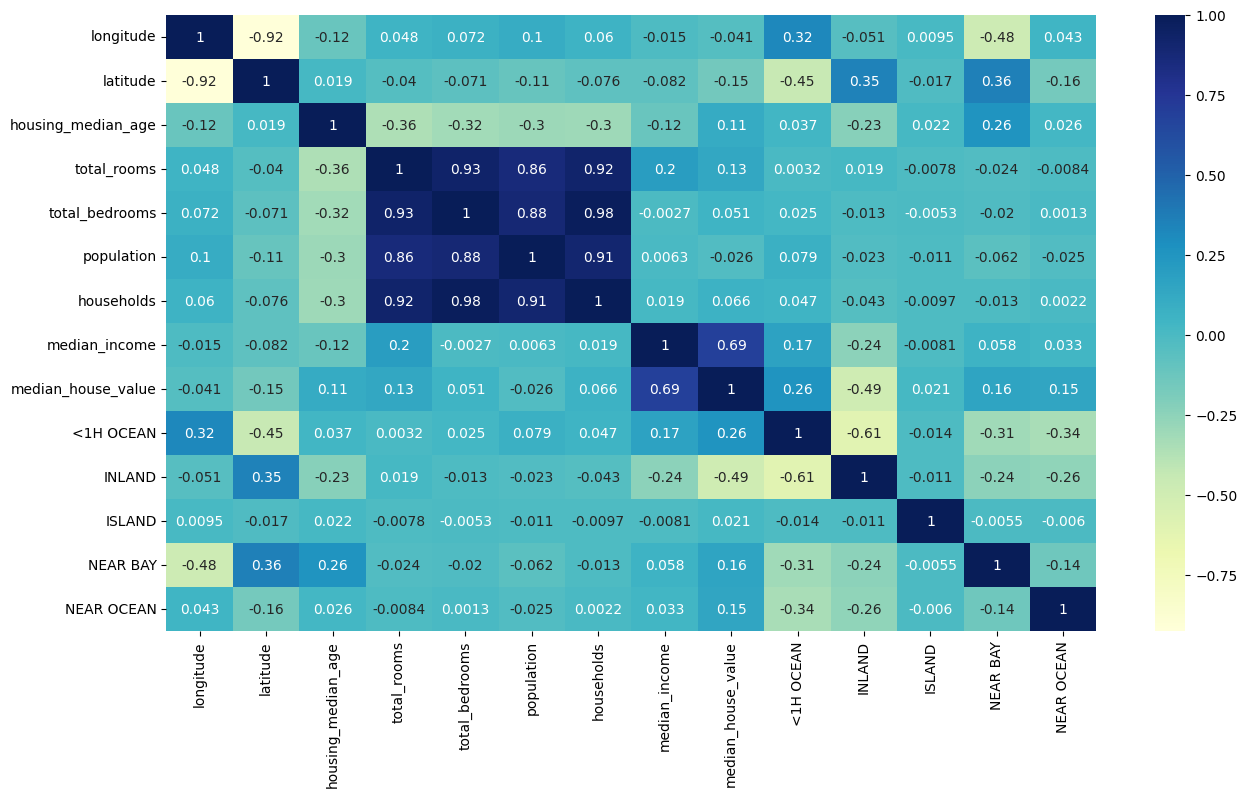

In [12]:
#corr function is for correlation
# plotting the heat map for corelation
# we can see that median income has a huge relation with the house price with the value of 0.68
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [13]:
# we can also create new useful features for our model
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/ train_data['households']


In [14]:
# we will have to divide the training data again over the new features 
X_train, y_train= train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6586,-118.22,34.22,39.0,2686.0,417.0,1094.0,402.0,7.0059,True,False,False,False,False,0.155249,6.681592
5607,-118.30,33.79,21.0,1068.0,283.0,1180.0,274.0,2.5000,True,False,False,False,False,0.264981,3.897810
10407,-117.58,33.66,4.0,3305.0,644.0,1693.0,597.0,5.2497,True,False,False,False,False,0.194856,5.536013
19640,-120.79,37.53,20.0,1417.0,263.0,853.0,263.0,3.3083,False,True,False,False,False,0.185603,5.387833
14815,-117.18,32.70,44.0,2655.0,514.0,1102.0,489.0,3.6759,False,False,False,False,True,0.193597,5.429448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,-122.27,37.98,23.0,3455.0,479.0,1375.0,474.0,6.0289,False,False,False,True,False,0.138640,7.289030
17980,-121.94,37.31,30.0,4238.0,1010.0,1914.0,972.0,3.7632,True,False,False,False,False,0.238320,4.360082
7419,-118.20,33.96,44.0,2144.0,477.0,1760.0,452.0,2.3221,True,False,False,False,False,0.222481,4.743363
13076,-121.30,38.59,25.0,3002.0,718.0,1660.0,613.0,2.1116,False,True,False,False,False,0.239174,4.897227


In [15]:
# as we added the new features in our training set we we have to do the same wih our test set
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/ test_data['households']
X_test, y_test= test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
992,-121.61,37.77,32.0,404.0,74.0,144.0,58.0,4.2083,False,True,False,False,False,0.183168,6.965517
6250,-117.98,34.04,34.0,2547.0,537.0,2108.0,498.0,3.4722,True,False,False,False,False,0.210836,5.114458
13372,-117.51,34.14,21.0,2455.0,381.0,1094.0,327.0,4.6437,False,True,False,False,False,0.155193,7.507645
19101,-122.62,38.25,20.0,1888.0,411.0,826.0,396.0,2.8750,True,False,False,False,False,0.217691,4.767677
12744,-121.37,38.64,36.0,322.0,48.0,133.0,59.0,4.6111,False,True,False,False,False,0.149068,5.457627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,-117.88,34.13,25.0,2559.0,654.0,1674.0,623.0,2.8547,True,False,False,False,False,0.255569,4.107544
2542,-124.17,40.80,52.0,1557.0,344.0,758.0,319.0,1.8529,False,False,False,False,True,0.220938,4.880878
12580,-121.42,38.51,21.0,3249.0,666.0,2611.0,663.0,1.9423,False,True,False,False,False,0.204986,4.900452
20094,-120.03,38.19,26.0,7005.0,1358.0,416.0,189.0,2.1250,False,True,False,False,False,0.193862,37.063492


In [17]:
# now we are going to fit the model 
model=  RandomForestRegressor(n_estimators=800, random_state=42)
model.fit(X_train, y_train)
regressors = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=800, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Evaluate each model
results = {}
for name, model in regressors.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)
    



0.6297546543257573
0.24958386300344193
0.8215849193001099
0.7718060430895701


In [16]:
# As we came to know that the random forest has the best accuracy out of all the other models we will use it for hyper-parameter tuning
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [600, 800,900],
    'max_depth': [None, 10, 30],
}

# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .....................max_depth=10, n_estimators=600; total time=  32.5s
[CV] END .....................max_depth=10, n_estimators=800; total time=  44.6s
[CV] END .....................max_depth=30, n_estimators=800; total time= 1.0min
[CV] END .....................max_depth=10, n_estimators=600; total time=  32.4s
[CV] END .....................max_depth=10, n_estimators=800; total time=  44.9s
[CV] END .....................max_depth=30, n_estimators=900; total time= 1.1min
Best parameters: {'max_depth': None, 'n_estimators': 900}


In [18]:
# Fit the model with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Evaluate the best model to get the best accuracy for prediction
score = best_rf.score(X_test, y_test)
print(f"Best Random Forest score: {score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Mean difference in price): {mae}")


Best Random Forest score: 0.8115483506509373
Mean Absolute Error (Mean difference in price): 32184.781129054183


## Summary 
I used different regressor models to train them and check their accuracy on the test dataset. Among Decision Tree, Random Forest, KNN, and Gradient Boosting, Random Forest had the highest accuracy. I then used GridSearchCV to find the best hyperparameters for optimal accuracy and proceeded with that model. The accuracy is 81.1%, and the mean price difference between the actual value and the predicted value is $32,184.